# Python Data Analysis Project - Part 1 (EDA - Exploratory data analysis)
- Missing values (Null)
- Visualization
- Grouping
- Feature (effect on the labels)



#### Import & read the csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm - Tree Disition 
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

# Importing the necessary libraries for Plotting the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier # Importing the Random forest algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
churn = pd.read_csv("churn.CSV")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# change the string value in "churn" to numerical value
churn.loc[churn.Churn == 'No', 'Churn'] = 0
churn.loc[churn.Churn == 'Yes', 'Churn'] = 1
churn = churn.astype({"Churn": 'int64'}) 


Customers = len(churn)
Churned = sum(churn['Churn'])

print("We have %d customers but only %d of them has churned (%f%%)" % (Customers, Churned, (Churned/Customers*100)))

We have 7043 customers but only 1869 of them has churned (26.536987%)


In [4]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


### 1. Missing Values - How many missing values are in the database

In [5]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### Answer: The no variables having missing values 

### 2. Visualization

#### 2.1. Gender distribution and churn customers

##### What is total number of churn cases for each gender ?


In [6]:
dfGender = churn.groupby('gender').agg({'Churn':['sum']})
dfGender

,Churn
,sum
gender,
Female,939
Male,930


In [7]:
churn_sum_by_gender = churn.groupby('gender')['Churn'].sum()
sum_female_churn_1 = churn_sum_by_gender['Female']
sum_male_churn_1 = churn_sum_by_gender['Male']
# Calculate the percentages

total_churn = sum_female_churn_1 + sum_male_churn_1
percent_female_churn = (sum_female_churn_1 / total_churn) * 100
percent_male_churn = (sum_male_churn_1 / total_churn) * 100
print("Conclusion:")
# Print the results

print("The Number of Female Churn Cases:", sum_female_churn_1, f"({percent_female_churn:.2f}%)")
print("The Number of Male Churn Cases:", sum_male_churn_1, f"({percent_male_churn:.2f}%)")

Conclusion:
The Number of Female Churn Cases: 939 (50.24%)
The Number of Male Churn Cases: 930 (49.76%)


#### 2.2. Tenure distribution and churn customers

##### What is the distribution of customer tenure?

In [8]:
churn['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

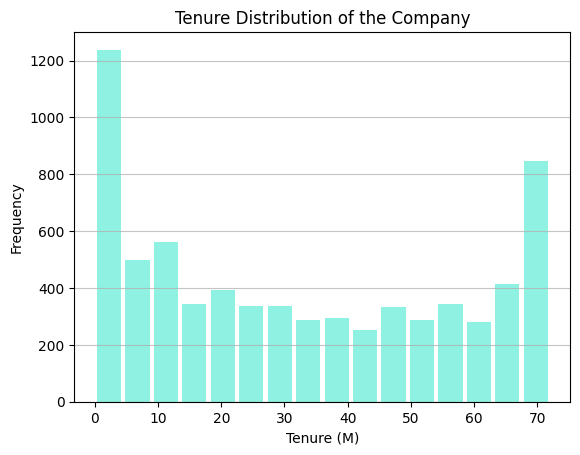

In [9]:

plt.hist(churn['tenure'].dropna(),bins='auto', color='#20E4C6',alpha=0.5, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure (M)')
plt.ylabel('Frequency')
plt.title('Tenure Distribution of the Company')

plt.show()

#### 2.3. Average Monthly Charge By Contract

##### Is there a significant price difference between contracts? How does this affect customer decisions when choosing a contract?

In [10]:
dfBar = churn.groupby('Contract').agg({'MonthlyCharges':'mean'})
dfBar

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


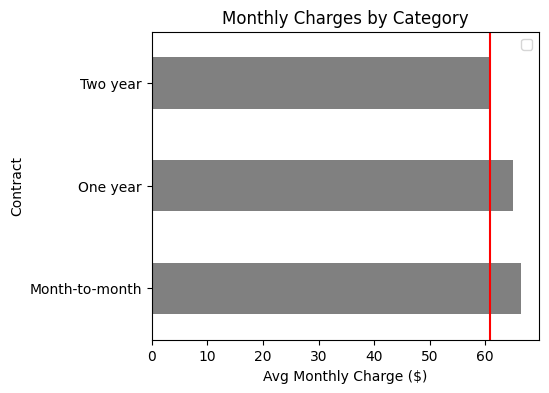

In [11]:
lowest_average_column = dfBar['MonthlyCharges'].idxmin()

ax = dfBar.plot(kind='barh', y='MonthlyCharges', figsize=(5, 4), color='gray')
ax.axvline(x=dfBar.loc[lowest_average_column, 'MonthlyCharges'], color='r')

plt.title('Monthly Charges by Category')
plt.xlabel('Avg Monthly Charge ($)')
plt.legend('')

plt.show()

In [12]:
print("Conclusion:")
print ("There is no significant price difference between contracts ,We would have expected larger differences to make it more profitable for customers to take long-term contracts")

Conclusion:
There is no significant price difference between contracts ,We would have expected larger differences to make it more profitable for customers to take long-term contracts


#### 2.4. Mean Churn Rate by Senior Citizen Status

##### Is the Churn for Senior Citizens higher?


In [13]:
senior = churn.groupby('SeniorCitizen').agg({'Churn':['count','mean']})
senior  

senior_replaced = senior.rename(index={1: "Yes", 0: "No"})
senior_replaced

Churn          
              count      mean
SeniorCitizen                
No             5901  0.236062
Yes            1142  0.416813

<function matplotlib.pyplot.show(close=None, block=None)>

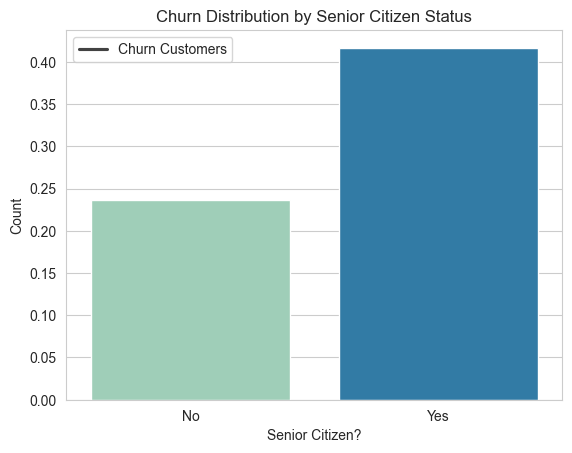

In [14]:
sns.set_style("whitegrid")
sns.barplot(x="SeniorCitizen" ,y = ('Churn', 'mean'),data = senior_replaced,palette = "YlGnBu",hue="SeniorCitizen")
plt.title('Churn Distribution by Senior Citizen Status')
plt.xlabel('Senior Citizen?')

plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend (labels=['Churn Customers'],title = '')
plt.show

In [15]:
print("Conclusion:")
print ("Yes,the Churn case for Senior Citizens is higher ")

Conclusion:
Yes,the Churn case for Senior Citizens is higher 


#### 2.5. Average Monthly Charge By Internet Serve

##### Is there a significant Avg price difference between Internet Service? How does this affect customer decisions when choosing a Internet Service?

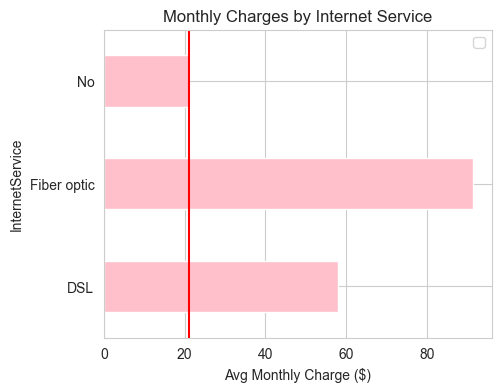

In [16]:
In_fBar = churn.groupby('InternetService').agg({'MonthlyCharges':'mean'})
In_fBar

lowest_In_average_column = In_fBar['MonthlyCharges'].idxmin()

ax = In_fBar.plot(kind='barh', y='MonthlyCharges', figsize=(5, 4), color='pink')
ax.axvline(x=In_fBar.loc[lowest_In_average_column, 'MonthlyCharges'], color='r')

plt.title('Monthly Charges by Internet Service')
plt.xlabel('Avg Monthly Charge ($)')
plt.legend('')

plt.show()

In [17]:
print("Conclusion:")
print ('The average payment is much higher than the other options, the expectation that the high payment is worth it for the service')

Conclusion:
The average payment is much higher than the other options, the expectation that the high payment is worth it for the service


#### 2.6. Average Monthly Charge By Internet Serve

##### The usage percentages of Senior Citizens in  each type of Internet service?

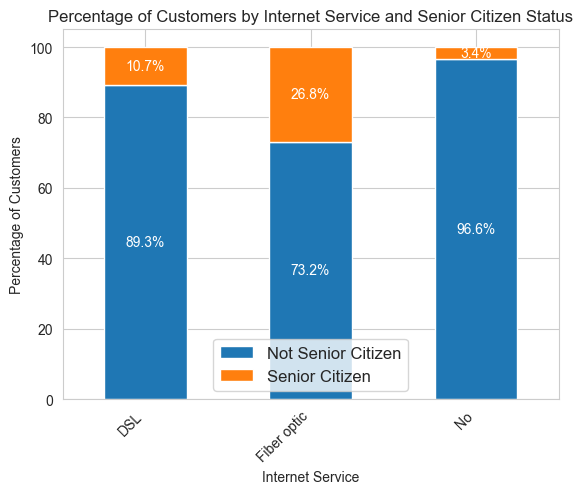

In [18]:
y1 = churn.groupby(['InternetService', 'SeniorCitizen']).agg({'customerID': ['count']})

y1 = y1.reset_index()

y1.columns = ['InternetService', 'SeniorCitizen', 'cnt_customers']

total_customers = y1.groupby('InternetService')['cnt_customers'].sum().reset_index()
total_customers.columns = ['InternetService', 'total_customers']

y1 = y1.merge(total_customers, on='InternetService')

y1['percentage'] = (y1['cnt_customers'] / y1['total_customers']) * 100

# Pivot the DataFrame to get the correct shape for plotting
yp1 = y1.pivot(index='InternetService', columns='SeniorCitizen', values='percentage')

yyp1 = yp1.plot(kind='bar', stacked=True)

for container in yyp1.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0: 
            label_x = bar.get_x() + bar.get_width() / 2
            label_y = bar.get_y() + height / 2
            label_text = f'{height:.1f}%'  # Format as percentage with one decimal place
            yyp1.text(label_x, label_y, label_text, ha='center', va='center', color='white')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Internet Service')
plt.ylabel('Percentage of Customers')
plt.title('Percentage of Customers by Internet Service and Senior Citizen Status')


plt.legend(labels=['Not Senior Citizen', 'Senior Citizen'], title='', loc='lower center', fontsize=12)


plt.show()


In [19]:
print("Conclusion:")
print ('Percentages of SeniorCitizen with Fiber Optic internet service is higher then other options')

Conclusion:
Percentages of SeniorCitizen with Fiber Optic internet service is higher then other options


### 3. Grouping - Tenure group distribution and Churn

#### Divide customers by tenure	
- Welcome Customers : 0-4 months
- New Customers: 5-22 months
- Early Mid-Tenure Customers: 23-40
- Late Mid-Tenure Customers: 41-58
- Long-Term Customers : 59 +

In [20]:
churn.loc[(churn['tenure'] <= 4), 'TenureGroup'] = '0-4' # 4 months for new - Welcome Customers
churn.loc[(churn['tenure'] >= 5) & (churn['tenure'] < 23 ), 'TenureGroup'] = '5-22' # 17 months
churn.loc[(churn['tenure'] >= 23) & (churn['tenure'] < 41 ), 'TenureGroup'] = '23-40' # 17 months
churn.loc[(churn['tenure'] >= 41) & (churn['tenure'] < 59 ), 'TenureGroup'] = '41-58' # 17 months
churn.loc[(churn['tenure'] >= 59) & (churn['tenure'] <= 72 ), 'TenureGroup'] = '59+' # 17 months
churn.loc[(churn['tenure'].isnull()),'TenureGroup'] = 'No Tenure'
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-4
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,23-40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,41-58
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,23-40
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,59+
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,5-22
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1,0-4


In [21]:
xx= churn.groupby('TenureGroup').agg({'customerID':'count'})
print('Tenure Groups includes similar number of customers')
xx

Tenure Groups includes similar number of customers


,customerID
TenureGroup,
0-4,1238
23-40,1255
41-58,1214
5-22,1793
59+,1543


Text(0.5, 1.0, 'Churn Rate by Tenure Group')

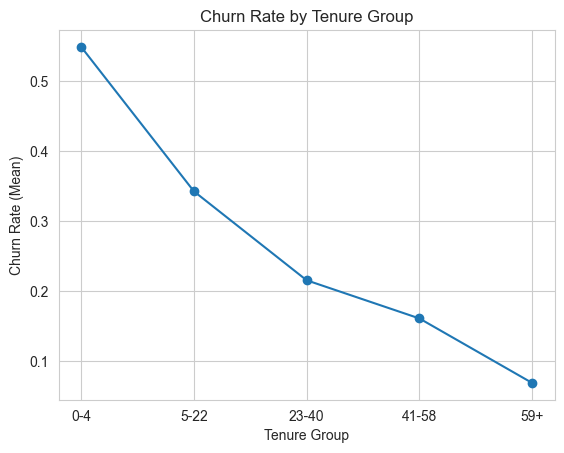

In [22]:
custom_order = ["0-4", "5-22", "23-40", "41-58", "59+"]
dfTenureGroup = churn.groupby('TenureGroup').agg({'Churn': ['mean']})
dfTenureGroup = dfTenureGroup.reindex(custom_order)

plt.plot(dfTenureGroup.index, dfTenureGroup['Churn']['mean'], marker='o', linestyle='-')

plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (Mean)')
plt.title('Churn Rate by Tenure Group')



In [23]:
print("Conclusion:")
print ("The longer the tenure, the lower the Churn Rate")

Conclusion:
The longer the tenure, the lower the Churn Rate


#### 4.1. Monthly Charges by Tenure Group and Churn Status

##### What is the average monthly charge for customers in different tenure groups who churned VS those who didn't?

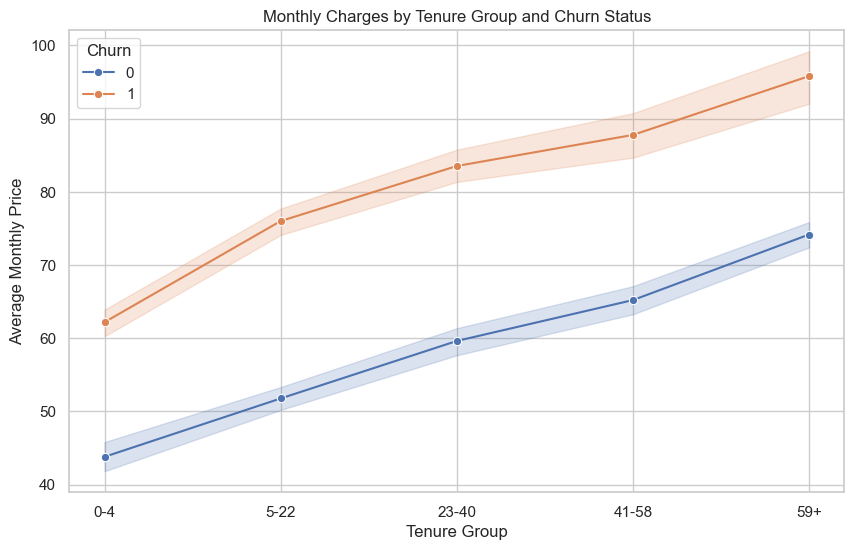

In [24]:
custom_order = ["0-4", "5-22", "23-40", "41-58", "59+"]
tc_aggregated = churn.groupby(['TenureGroup', 'Churn']).agg({'MonthlyCharges':['mean','count']}).reset_index()
tc_aggregated
churn['TenureGroup'] = pd.Categorical(churn['TenureGroup'], categories=custom_order, ordered=True)

# Set the style for the plot
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.lineplot(x='TenureGroup', y='MonthlyCharges', hue='Churn', data=churn, marker='o')


# Set plot title and labels
plt.title('Monthly Charges by Tenure Group and Churn Status')
plt.xlabel('Tenure Group')
plt.ylabel('Average Monthly Price')
plt.legend(title='Churn')

# Show the plot
plt.show()

In [25]:
print("Conclusion:")
print ("The longer a customer has been with the company, the higher their monthly payment")
print ("customers churn , paid more in each of the customer groups ")

Conclusion:
The longer a customer has been with the company, the higher their monthly payment
customers churn , paid more in each of the customer groups 


#### 4.1. Churn Rate By Internet Service Group

##### Which type of internet service experiences the highest average churn rate?

In [26]:
s = churn.groupby('InternetService').agg({'Churn':['count','sum','mean']})
s = s[('Churn', 'mean')]
s 

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: (Churn, mean), dtype: float64

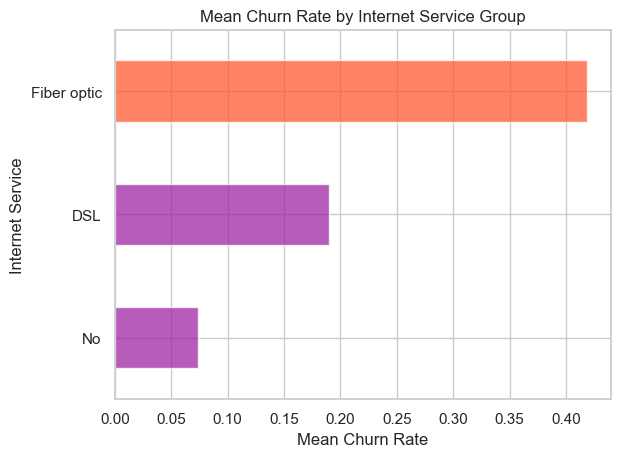

In [27]:
sorted_s = s.sort_values(ascending=True)
colors = ['#9F25A3' if x != sorted_s.idxmax() else '#FF5733' for x in sorted_s.index]
sorted_s.plot(kind='barh', color= colors, alpha=0.75)

plt.title('Mean Churn Rate by Internet Service Group')
plt.xlabel('Mean Churn Rate')
plt.ylabel('Internet Service')

plt.show()

In [28]:
print("Conclusion:")
print ("Fiber internet service with the highest average churn rate")

Conclusion:
Fiber internet service with the highest average churn rate


#### 4.2. Churn Rate Percentage By Support Level

##### Are there differences in churn rates between customers with and without tech support?

In [29]:
z = churn.groupby('TechSupport').agg({'Churn':['count','sum','mean']})
z= z['Churn','count'] 
z

TechSupport
No                     3473
No internet service    1526
Yes                    2044
Name: (Churn, count), dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

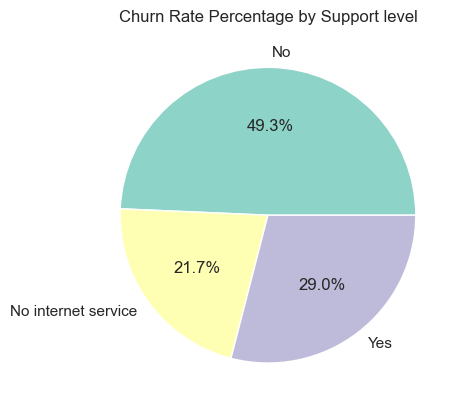

In [30]:
plt.pie(z, labels=z.index, autopct='%1.1f%%', colors=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'])
plt.title('Churn Rate Percentage by Support level')

plt.show

In [31]:
print("Conclusion:")
print ("Yes, the presentage to churn without tech support is higher then other support opttenion" )

Conclusion:
Yes, the presentage to churn without tech support is higher then other support opttenion


#### 4.3 Internet Service Group & Support Level  By Churn Customers

##### How do customers' preferences for internet services and tech support influence their likelihood to churn?

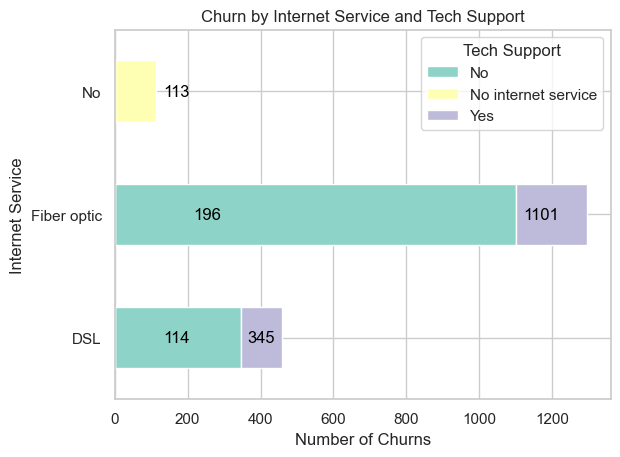

In [32]:
x_s = churn.groupby(['InternetService', 'TechSupport']).agg({'Churn': 'sum'})
x_s
x = x_s.reset_index()
x.columns = ['InternetService', 'TechSupport', 'Churn']
xp = x.pivot(index='InternetService', columns='TechSupport', values='Churn')
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']
ax = xp.plot(kind='barh', stacked=True, color=colors)
for bar in ax.patches:
    height = bar.get_width() 
    if height > 0: 
        ax.annotate(f'{height:.0f}', (height, bar.get_y() + bar.get_height() / 2), 
                    xytext=(5, 0), textcoords='offset points',
                    ha='left', va='center', color='black')
plt.xlabel('Number of Churns')
plt.ylabel('Internet Service')
plt.title('Churn by Internet Service and Tech Support')
plt.legend(title='Tech Support')
plt.show()

In [33]:
print("Conclusion:")
print ("This graph reinforces the claim that for the Fiber Optic service there is a higher abandonment rate.since we know that abandonment rates increase when there is no service")

Conclusion:
This graph reinforces the claim that for the Fiber Optic service there is a higher abandonment rate.since we know that abandonment rates increase when there is no service


#### 4.4 Payment Method By Churn 

##### Which payment method has the highest impact overall customer compare to others? And has the  highest impact to churn ? 

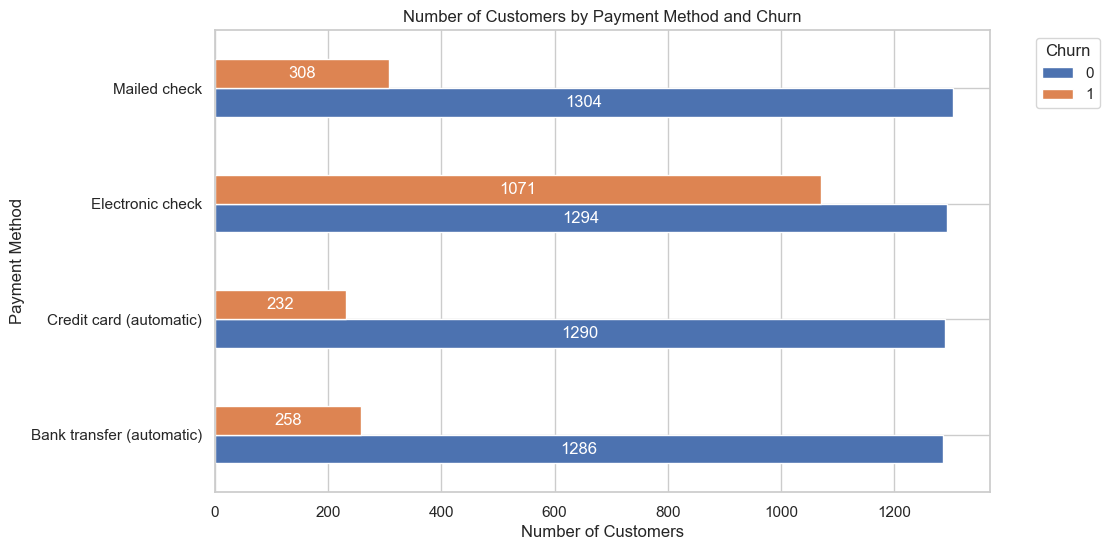

In [34]:
x = churn.groupby(['PaymentMethod', 'Churn']).agg({'customerID': 'count'})
x = x.reset_index()
x.columns = ['PaymentMethod', 'Churn', 'cnt_customers']

xp = x.pivot(index='PaymentMethod', columns='Churn', values='cnt_customers')

ax = xp.plot(kind='barh',  figsize=(10, 6))
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        label_x = bar.get_x() + width / 2
        label_y = bar.get_y() + bar.get_height() / 2
        label_text = f'{int(width)}'
        ax.text(label_x, label_y, label_text, ha='center', va='center', color='white')

plt.xlabel('Number of Customers')
plt.ylabel('Payment Method')
plt.title('Number of Customers by Payment Method and Churn')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()



In [35]:
print("Conclusion:")
print ("Electronic check payment method has the highest impact to churn")

Conclusion:
Electronic check payment method has the highest impact to churn


#### 4.5. Churn by contract type

##### Which contract type has the highest number of customers leaving?

In [36]:
dfPie = churn.groupby('Contract').agg({'Churn':'sum'})
dfPie

,Churn
Contract,
Month-to-month,1655
One year,166
Two year,48


<Figure size 500x500 with 0 Axes>

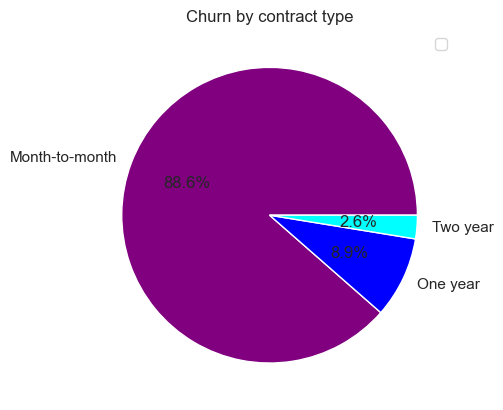

In [37]:
colors = ['purple' , 'blue', 'cyan' ]

plt.figure(figsize=(5, 5))  

dfPie.plot.pie(y='Churn', autopct='%1.1f%%', colors=colors)

plt.legend('')  
plt.ylabel('')  
plt.title("Churn by contract type")  

plt.show()

In [38]:
print("Conclusion:")
print ("Mont-to-month contract type has the highest number of customers churn")

Conclusion:
Mont-to-month contract type has the highest number of customers churn


#### 4.6. Count of Churn Customers by Contract Type and Payment Method

##### Which payment method is most commonly used within each contract type ?

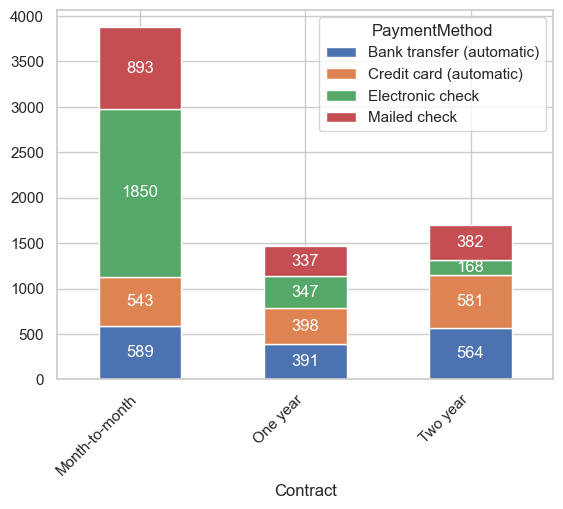

In [39]:
y = churn.groupby(['Contract','PaymentMethod']).agg({'customerID':['count']})

y = y.reset_index()
y.columns = ['Contract','PaymentMethod','cnt_customers']
yp = y.pivot(index='Contract', columns='PaymentMethod', values='cnt_customers')


yyp = yp.plot(kind='bar', stacked=True)

for container in yyp.containers:
    for bar in container:
        height = bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        label_y = bar.get_y() + height / 2
        label_text = f'{int(height)}'
        yyp.text(label_x, label_y, label_text, ha='center', va='center', color='white')

plt.xticks(rotation=45, ha='right')
plt.show()


In [40]:
print("Conclusion:")
print ("This graph reinforces the claim that for the Month-to-month contract is a higher churn rate since we know that abandonment rates increase when Payment Method is Electronic Check")

Conclusion:
This graph reinforces the claim that for the Month-to-month contract is a higher churn rate since we know that abandonment rates increase when Payment Method is Electronic Check


In [41]:
print( "Churn Rates are not being caused by one single reason. They have higher rates on Month to Month Contracts, E- Checks and certain Internet Services and Support")

Churn Rates are not being caused by one single reason. They have higher rates on Month to Month Contracts, E- Checks and certain Internet Services and Support


# Python Data Analysis Project - Part 2 (Data Preperation & Correlations)
- Data Cleaning :
   - Rename columns to lower letters
   - Handling missing values - No Missing Values
   - Removing irrelevant columns 
   - categorical values

In [42]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-4
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,23-40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,41-58
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-4


### 1. Cleaning Data 

In [43]:
#--------------------------------------------------------------
#1.1 Rename columns to lower letters
churn =churn.rename(columns=str.lower)
#--------------------------------------------------------------
#1.2 Changinge\add Columns 
#“Multiplelines” Feature - Changing a feature from a string into a category. "No Service" means zero lines, "No" means one line, and the rest are two. The new Attribute is now named Number of Lines
for i in range(len(churn)):
    y = churn.at[i, 'multiplelines']
    if y == "No phone service":
        churn.at[i, 'multiplelines'] = 0
    elif y == "No":
        churn.at[i, 'multiplelines'] = 1
    else:
        churn.at[i, 'multiplelines'] = 2
churn.rename(columns={'multiplelines': 'linenumber'}, inplace=True)
churn['linenumber']	 = churn['linenumber'].astype(int)

#--------------------------------------------------------------
#"Supportlevel" Feature  - We assume all support and security attributes are equally important, so we created a new feature that performs 
#cumulative calculation of the number of features with service for features:” Onlinesecurity”, ”Deviceprotection”, “Techsupport”, “onlinebackup”.
churn['supportlevel'] = churn[['onlinesecurity', 'deviceprotection', 'techsupport','onlinebackup']].apply(lambda row: (row == 'Yes').sum(), axis=1)
#--------------------------------------------------------------
#"Strining" Feature -  We assume all streaming services are equally important, so we created a new feature that performs cumulative calculation of the number of features with service for features:” streamingtv”,” streamingmovies”.
churn['streaming'] = churn[['streamingtv', 'streamingmovies']].apply(lambda row: (row == 'Yes').sum(), axis=1)
#--------------------------------------------------------------
#“Contract period (y)” Feature - Changing a feature from a string into a category, Assuming contract names "Month-to-month" does not go over a year and is less fixed than
#a yearly or a two-year contract, we have created a new feature to rank the period contract ,Two years being the longest period.
for a in range(len(churn)):
    y = churn.at[a, 'contract']
    if y == "Month-to-month":
        churn.at[a, 'contract'] = 0
    elif y == "One year":
        churn.at[a, 'contract'] = 1
    else:
        churn.at[a, 'contract'] = 2
churn.rename(columns={'contract': 'contract period (y)'}, inplace=True)
churn['contract period (y)']	 = churn['contract period (y)'].astype(int)
#--------------------------------------------------------------
#“InternetClassification” Feature - We rank the payment methods from 1 to 3 based on the conclusions drawn from the previous step (EDA).
#The most expensive payment method is Fiber optic, which will be rated as 1, followed by DSL rated as 2, and finally without service rated as 3.
churn['InternetClassification'] = churn['internetservice'].apply(lambda x: 1 if x == 'Fiber optic' else (2 if x == 'DSL' else 3))
#--------------------------------------------------------------
#“Paymentmethodtype” Feature - Classification of the type of payment according to automatic / manual payment
churn['paymentmethodtype'] = ['Automatic' if 'automatic' in method.lower() else 'Manual' for method in churn['paymentmethod']]
#--------------------------------------------------------------
# 1.3 Removing irrelevant columns 
dropped_column = churn['customerid']
churn = churn.drop(['customerid','streamingtv','streamingmovies','totalcharges' ,'tenuregroup' ], axis=1)
churn = churn.drop(['onlinesecurity', 'deviceprotection', 'techsupport','onlinebackup'],axis = 1)
churn = churn.drop(['paymentmethod','internetservice'], axis=1)

#--------------------------------------------------------------
churn.partner = (churn.partner=='Yes').astype('int')
churn.dependents = (churn.dependents=='Yes').astype('int')
churn.phoneservice = (churn.phoneservice=='Yes').astype('int')
churn.paperlessbilling = (churn.paperlessbilling=='Yes').astype('int')
#--------------------------------------------------------------
churn



,gender,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,paymentmethodtype
0,Female,0,1,0,1,0,0,0,1,29.85,0,1,0,2,Manual
1,Male,0,0,0,34,1,1,1,0,56.95,0,2,0,2,Manual
2,Male,0,0,0,2,1,1,0,1,53.85,1,2,0,2,Manual
3,Male,0,0,0,45,0,0,1,0,42.30,0,3,0,2,Automatic
4,Female,0,0,0,2,1,1,0,1,70.70,1,0,0,1,Manual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,2,1,1,84.80,0,3,2,2,Manual
7039,Female,0,1,1,72,1,2,1,1,103.20,0,2,2,1,Automatic
7040,Female,0,1,1,11,0,0,0,1,29.60,0,1,0,2,Manual
7041,Male,1,1,0,4,1,2,0,1,74.40,1,0,0,1,Manual


#### 1.3 Categorical values

In [44]:
churn = pd.get_dummies(churn)
churn

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
0,0,1,0,1,0,0,0,1,29.85,0,1,0,2,True,False,False,True
1,0,0,0,34,1,1,1,0,56.95,0,2,0,2,False,True,False,True
2,0,0,0,2,1,1,0,1,53.85,1,2,0,2,False,True,False,True
3,0,0,0,45,0,0,1,0,42.30,0,3,0,2,False,True,True,False
4,0,0,0,2,1,1,0,1,70.70,1,0,0,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,1,1,84.80,0,3,2,2,False,True,False,True
7039,0,1,1,72,1,2,1,1,103.20,0,2,2,1,True,False,True,False
7040,0,1,1,11,0,0,0,1,29.60,0,1,0,2,True,False,False,True
7041,1,1,0,4,1,2,0,1,74.40,1,0,0,1,False,True,False,True


In [45]:
churn.gender_Female = churn.gender_Female.astype(int)
churn.gender_Male = churn.gender_Male.astype(int)
churn.paymentmethodtype_Automatic = churn.paymentmethodtype_Automatic.astype(int)
churn.paymentmethodtype_Manual = churn.paymentmethodtype_Manual.astype(int)
churn

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
0,0,1,0,1,0,0,0,1,29.85,0,1,0,2,1,0,0,1
1,0,0,0,34,1,1,1,0,56.95,0,2,0,2,0,1,0,1
2,0,0,0,2,1,1,0,1,53.85,1,2,0,2,0,1,0,1
3,0,0,0,45,0,0,1,0,42.30,0,3,0,2,0,1,1,0
4,0,0,0,2,1,1,0,1,70.70,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,1,1,84.80,0,3,2,2,0,1,0,1
7039,0,1,1,72,1,2,1,1,103.20,0,2,2,1,1,0,1,0
7040,0,1,1,11,0,0,0,1,29.60,0,1,0,2,1,0,0,1
7041,1,1,0,4,1,2,0,1,74.40,1,0,0,1,0,1,0,1


In [46]:
churn.dtypes

seniorcitizen                    int64
partner                          int32
dependents                       int32
tenure                           int64
phoneservice                     int32
linenumber                       int32
contract period (y)              int32
paperlessbilling                 int32
monthlycharges                 float64
churn                            int64
supportlevel                     int64
streaming                        int64
InternetClassification           int64
gender_Female                    int32
gender_Male                      int32
paymentmethodtype_Automatic      int32
paymentmethodtype_Manual         int32
dtype: object

### 2. Finding intresting relationships

Verifiing that the Churn levels remained the same after cleaning and sorting the data

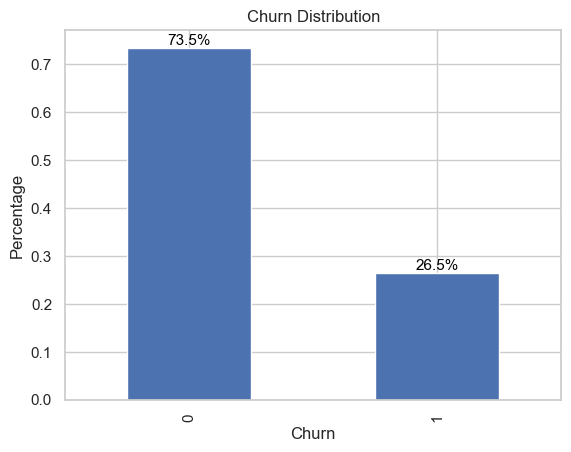

In [47]:
ax = churn['churn'].value_counts(normalize=True).plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Churn Distribution')    
plt.show()

In [48]:
churn.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,1.325004,0.690473,0.592219,64.761692,0.265370,1.265654,0.772256,1.777084,0.495244,0.504756,0.435326,0.564674
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.833755,0.491457,30.090047,0.441561,1.286879,0.852573,0.778877,0.500013,0.500013,0.495835,0.495835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,70.350000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,89.850000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,1.000000,118.750000,1.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
churn.corr()

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,-0.142554,0.156530,0.220173,0.150889,0.011562,0.128818,-0.259390,0.001874,-0.001874,-0.033520,0.033520
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.294806,-0.014877,0.096848,-0.150448,0.201652,0.138243,0.000132,0.001808,-0.001808,0.160475,-0.160475
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,0.243187,-0.111377,-0.113890,-0.164221,0.064668,-0.032163,0.179631,-0.010517,0.010517,0.093439,-0.093439
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.671607,0.006152,0.247900,-0.352229,0.495557,0.323161,-0.033230,-0.005106,0.005106,0.396626,-0.396626
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.002247,0.016505,0.247398,0.011942,-0.112241,-0.031719,-0.093720,0.006488,-0.006488,-0.000104,0.000104
linenumber,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.083343,0.133255,0.490700,0.036310,0.116561,0.211801,-0.307988,0.009451,-0.009451,0.086685,-0.086685
contract period (y),-0.142554,0.294806,0.243187,0.671607,0.002247,0.083343,1.000000,-0.176733,-0.074195,-0.396713,0.328115,0.120766,0.290189,-0.000126,0.000126,0.330452,-0.330452
paperlessbilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.133255,-0.176733,1.000000,0.352150,0.191825,0.097213,0.248734,-0.378108,0.011754,-0.011754,-0.024909,0.024909
monthlycharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490700,-0.074195,0.352150,1.000000,0.193356,0.564924,0.717871,-0.905491,0.014569,-0.014569,0.061086,-0.061086
churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.036310,-0.396713,0.191825,0.193356,1.000000,-0.173061,0.071162,-0.316846,0.008612,-0.008612,-0.209902,0.209902


<Axes: >

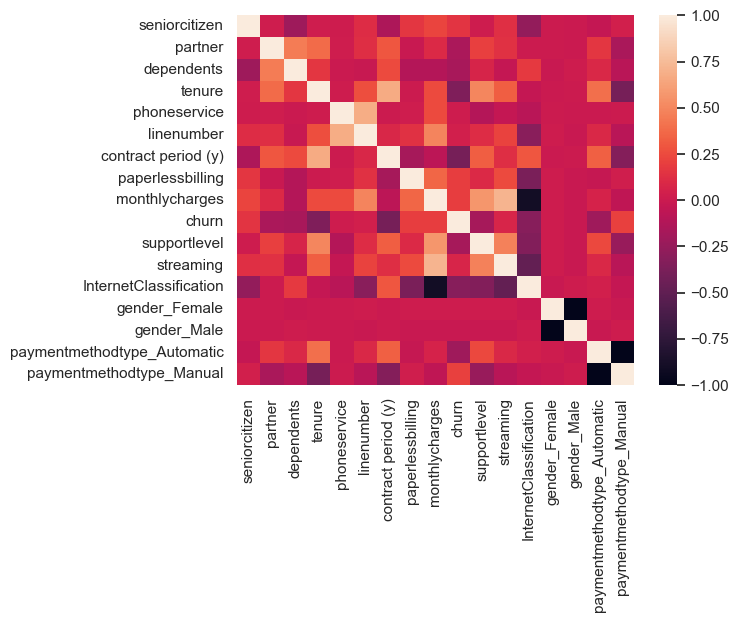

In [50]:
sns.heatmap(churn.corr())

paymentmethodtype_Manual       0.209902
monthlycharges                 0.193356
paperlessbilling               0.191825
seniorcitizen                  0.150889
streaming                      0.071162
linenumber                     0.036310
phoneservice                   0.011942
gender_Female                  0.008612
gender_Male                   -0.008612
partner                       -0.150448
dependents                    -0.164221
supportlevel                  -0.173061
paymentmethodtype_Automatic   -0.209902
InternetClassification        -0.316846
tenure                        -0.352229
contract period (y)           -0.396713
Name: churn, dtype: float64


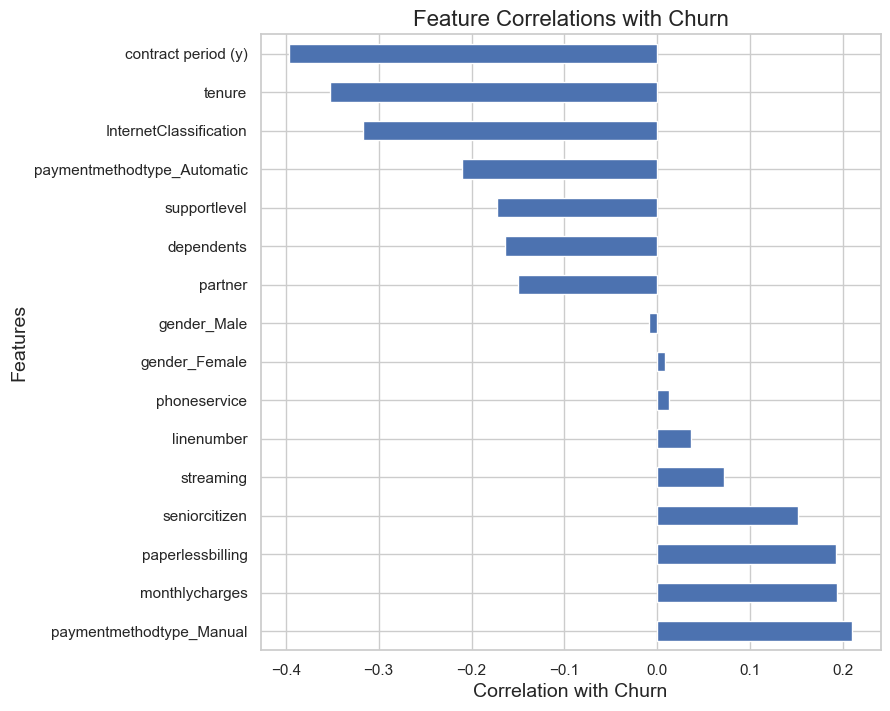

In [51]:
sort = churn.corr()['churn'].drop('churn')
sort = sort.sort_values(ascending=False)

print(sort)

plt.figure(figsize=(8,8))
sort.plot(kind='barh')
plt.xlabel('Correlation with Churn', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Correlations with Churn', fontsize=16)
plt.show()

#### 2.1 Churn by contract period classification

In [52]:
contractperiodclassification = churn.groupby('contract period (y)').churn.mean()
contractperiodclassification

contract period (y)
0    0.427097
1    0.112695
2    0.028319
Name: churn, dtype: float64

In [53]:
contractperiodclassification_distribution = churn['contract period (y)'].value_counts(normalize=True).sort_index()
contractperiodclassification_distribution

contract period (y)
0    0.550192
1    0.209144
2    0.240664
Name: proportion, dtype: float64

In [54]:
contractperiodpd = pd.DataFrame({'contractperiodclassification_dis':contractperiodclassification_distribution, 'churn_rate':contractperiodclassification})
contractperiodpd

,contractperiodclassification_dis,churn_rate
contract period (y),,
0,0.550192,0.427097
1,0.209144,0.112695
2,0.240664,0.028319


In [55]:
contractperiodpd.index = contractperiodpd.index.map({0:'Monthly', 1:'One Year', 2:'Two Year'})
contractperiodpd

,contractperiodclassification_dis,churn_rate
contract period (y),,
Monthly,0.550192,0.427097
One Year,0.209144,0.112695
Two Year,0.240664,0.028319


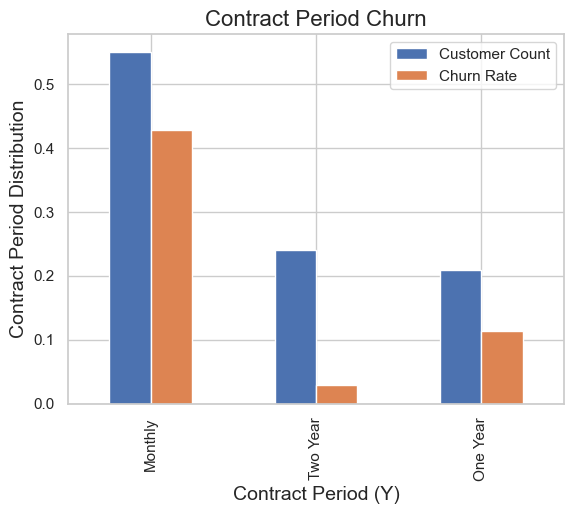

In [56]:
contractperiodpd_sorted = contractperiodpd.sort_values(by='contractperiodclassification_dis', ascending=False)

contractperiodpd_sorted.plot(kind='bar')

plt.legend(labels=['Customer Count', 'Churn Rate'])
plt.xlabel('Contract Period (Y)', fontsize=14)
plt.ylabel('Contract Period Distribution', fontsize=14)
plt.title('Contract Period Churn', fontsize=16)

# Show the plot
plt.show()

In [57]:
print("Conclusion:")
print("The number of customers for a monthly contract is the highest,  it can be noticed that the number of abandoners is also the highest")

Conclusion:
The number of customers for a monthly contract is the highest,  it can be noticed that the number of abandoners is also the highest


#### 2.2 Churn by Internet Classification

In [58]:
churn.InternetClassification.value_counts(normalize=True)

InternetClassification
1    0.439585
2    0.343746
3    0.216669
Name: proportion, dtype: float64

In [59]:
internetclassification_distribution = churn.InternetClassification.value_counts(normalize=True).sort_index()
internetclassification_distribution

InternetClassification
1    0.439585
2    0.343746
3    0.216669
Name: proportion, dtype: float64

In [60]:
churnbyinternetclassification = churn.groupby('InternetClassification').churn.mean()
churnbyinternetclassification

InternetClassification
1    0.418928
2    0.189591
3    0.074050
Name: churn, dtype: float64

In [61]:
internetclass_stats = pd.DataFrame({'internetclas_dist':internetclassification_distribution, 'churn_rate':churnbyinternetclassification})
internetclass_stats

,internetclas_dist,churn_rate
InternetClassification,,
1,0.439585,0.418928
2,0.343746,0.189591
3,0.216669,0.074050


In [62]:
internetclass_stats.index = internetclass_stats.index.map({1:'OpticFiber', 2:'DHL', 3:'Nothing'})
internetclass_stats

,internetclas_dist,churn_rate
InternetClassification,,
OpticFiber,0.439585,0.418928
DHL,0.343746,0.189591
Nothing,0.216669,0.074050


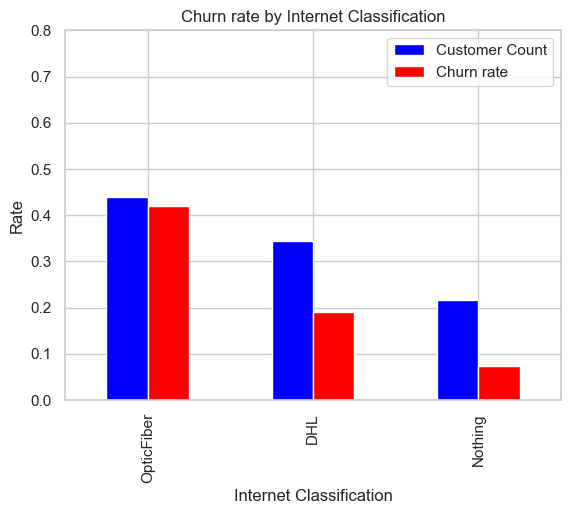

In [63]:
colors = ['blue', 'red']

ax = internetclass_stats.plot(kind='bar', color=colors) 

plt.xlabel('Internet Classification')
plt.ylabel('Rate')
plt.ylim(0, 0.8)
plt.title('Churn rate by Internet Classification')

legend_labels = ['Customer Count', 'Churn rate']
plt.legend(legend_labels)

plt.show()

In [64]:
print("Conclusion:")
print("The number of customers for a Fiber optic is the highest, and the churn rate is also at its highest.")

Conclusion:
The number of customers for a Fiber optic is the highest, and the churn rate is also at its highest.


# Python Data Analysis Project - Part 3 (Machine Learning)
- Algorithms :
  - Decision Tree
  - Random Forest
  - KNN - K Nearest Neighbors

In [65]:
churn['customerid'] = dropped_column
churn

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual,customerid
0,0,1,0,1,0,0,0,1,29.85,0,1,0,2,1,0,0,1,7590-VHVEG
1,0,0,0,34,1,1,1,0,56.95,0,2,0,2,0,1,0,1,5575-GNVDE
2,0,0,0,2,1,1,0,1,53.85,1,2,0,2,0,1,0,1,3668-QPYBK
3,0,0,0,45,0,0,1,0,42.30,0,3,0,2,0,1,1,0,7795-CFOCW
4,0,0,0,2,1,1,0,1,70.70,1,0,0,1,1,0,0,1,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,1,1,84.80,0,3,2,2,0,1,0,1,6840-RESVB
7039,0,1,1,72,1,2,1,1,103.20,0,2,2,1,1,0,1,0,2234-XADUH
7040,0,1,1,11,0,0,0,1,29.60,0,1,0,2,1,0,0,1,4801-JZAZL
7041,1,1,0,4,1,2,0,1,74.40,1,0,0,1,0,1,0,1,8361-LTMKD


In [66]:
churn.isna().sum()

seniorcitizen                  0
partner                        0
dependents                     0
tenure                         0
phoneservice                   0
linenumber                     0
contract period (y)            0
paperlessbilling               0
monthlycharges                 0
churn                          0
supportlevel                   0
streaming                      0
InternetClassification         0
gender_Female                  0
gender_Male                    0
paymentmethodtype_Automatic    0
paymentmethodtype_Manual       0
customerid                     0
dtype: int64

### 1. Test & Train preparation

In [67]:
train, test = train_test_split(churn, test_size=1408, random_state=1, shuffle=True)

In [68]:
x_train = train.drop('churn', axis=1)
x_train = x_train.drop('customerid', axis=1) 


y_train = train['churn']
psn_train = train['customerid'] 

x_test = test.drop('churn', axis=1)
x_test = x_test.drop('customerid', axis=1)
y_test = test['churn']
customer_test = test['customerid'] 

In [69]:
train

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,churn,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual,customerid
5154,0,1,1,17,1,2,0,1,104.20,1,2,2,1,1,0,0,1,9874-QLCLH
1814,0,1,1,12,1,1,2,0,19.70,0,0,0,3,0,1,0,1,5442-PPTJY
5946,0,0,0,42,1,1,1,0,73.90,1,4,1,2,1,0,1,0,6261-RCVNS
3881,0,1,0,71,1,2,2,0,65.15,0,3,0,2,0,1,1,0,2176-OSJUV
2389,0,1,1,71,1,2,1,0,85.45,0,3,2,2,0,1,0,1,6161-ERDGD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,0,0,9,1,2,0,1,100.50,1,1,2,1,0,1,0,1,0781-LKXBR
5192,0,0,1,60,1,1,2,0,19.95,0,0,0,3,0,1,0,1,3507-GASNP
3980,0,0,0,28,1,2,0,1,105.70,1,2,2,1,0,1,0,1,8868-WOZGU
235,0,0,0,2,1,2,0,1,54.40,1,1,0,2,0,1,0,1,1251-KRREG


In [70]:
x_train ##only the Features

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
5154,0,1,1,17,1,2,0,1,104.20,2,2,1,1,0,0,1
1814,0,1,1,12,1,1,2,0,19.70,0,0,3,0,1,0,1
5946,0,0,0,42,1,1,1,0,73.90,4,1,2,1,0,1,0
3881,0,1,0,71,1,2,2,0,65.15,3,0,2,0,1,1,0
2389,0,1,1,71,1,2,1,0,85.45,3,2,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,0,0,9,1,2,0,1,100.50,1,2,1,0,1,0,1
5192,0,0,1,60,1,1,2,0,19.95,0,0,3,0,1,0,1
3980,0,0,0,28,1,2,0,1,105.70,2,2,1,0,1,0,1
235,0,0,0,2,1,2,0,1,54.40,1,0,2,0,1,0,1


In [71]:
y_train ##only the Label

5154    1
1814    0
5946    1
3881    0
2389    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5635, dtype: int64

In [72]:
x_test ##only the Features

,seniorcitizen,partner,dependents,tenure,phoneservice,linenumber,contract period (y),paperlessbilling,monthlycharges,supportlevel,streaming,InternetClassification,gender_Female,gender_Male,paymentmethodtype_Automatic,paymentmethodtype_Manual
3381,0,0,0,41,1,1,1,1,79.85,3,2,2,1,0,1,0
6180,1,0,0,66,1,2,2,1,102.40,1,2,1,1,0,1,0
4829,0,0,0,12,1,1,0,1,45.00,0,0,2,1,0,1,0
3737,0,0,0,5,1,2,0,1,50.60,0,0,2,1,0,0,1
4249,0,1,1,10,1,1,1,1,65.90,2,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,0,0,0,9,1,2,0,1,85.50,0,1,1,0,1,0,1
2563,1,0,0,25,1,2,0,0,105.95,2,2,1,0,1,0,1
2028,0,0,0,15,1,1,2,0,19.60,0,0,3,1,0,0,1
2899,0,0,0,71,0,0,2,0,53.95,4,1,2,0,1,1,0


In [406]:
y_test ##only the Label

3381    0
6180    0
4829    0
3737    1
4249    0
       ..
6912    0
2563    1
2028    0
2899    0
3474    0
Name: churn, Length: 1408, dtype: int64

### 2. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test) 
y_train_pred_DecisionTree = clf.predict(x_train) 

output = pd.DataFrame({'customerid': customer_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree}) 
output

,customerid,churned_what_actualy_happened,churned_predicted_by_model
3381,8879-ZKJOF,0,0
6180,0201-MIBOL,0,0
4829,1600-DILPE,0,0
3737,8601-QACRS,1,0
4249,7919-ZODZZ,0,0
...,...,...,...
6912,2215-ZAFGX,0,1
2563,5130-IEKQT,1,0
2028,4452-ROHMO,0,0
2899,6164-HAQTX,0,0


In [84]:
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
print(f"Your Model's Accuracy  is {test_acc:.1%}")
DecisionTreeACC = test_acc


Your Model's Accuracy  is 80.1%


Validitating over-fitting

In [85]:
train_acc = accuracy_score(y_train, y_train_pred_DecisionTree)
print(f"Your Model's Train Accuracy  is {train_acc:.1%}")
DecisionTreeACCTrain = train_acc

Your Model's Train Accuracy  is 78.8%


####  2.1 decision trees plot 

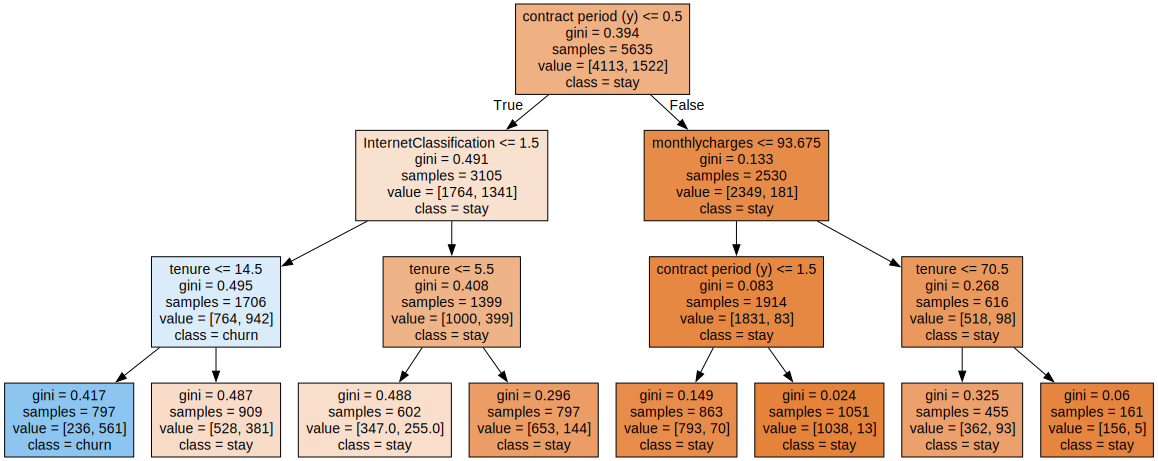

In [86]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['stay', 'churn'])

#### 2.2 Decision Tree Overfitting Test 

overfitting test to find the best accuracy score for the number of leaves

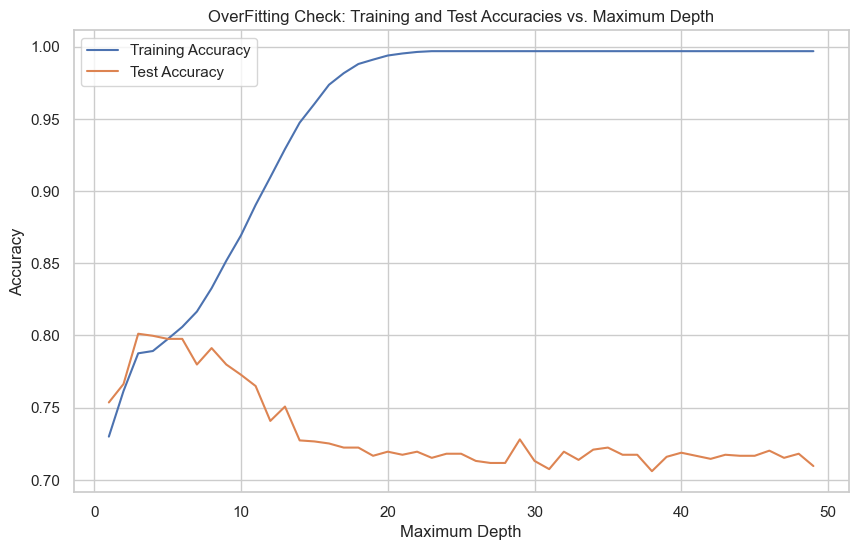

In [87]:
depth =range(1,50)

test_acc_scores = [] 
for x in depth:
    
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(x_train, y_train)

    y_test_pred_DecisionTree = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)

    test_acc_scores.append(test_acc)
    test_acc


r = pd.DataFrame({'depth': depth,'Test Accuracy': test_acc_scores})
# r
# r.plot(kind = 'line', x = 'depth', y ='Test Accuracy')
# --------------------------------------------------------------Train--------------------------------------------------
train_acc_scores = [] 
for t in depth:
    
    clf = DecisionTreeClassifier(max_depth=t)
    clf.fit(x_train, y_train)

    y_train_pred_DecisionTree = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred_DecisionTree)

    train_acc_scores.append(train_acc)
    train_acc


trainr = pd.DataFrame({'depth': depth,'Train Accuracy': train_acc_scores})
# trainr
# trainr.plot(kind = 'line', x = 'depth', y ='Train Accuracy')

plt.figure(figsize=(10, 6))
plt.plot(depth, train_acc_scores, label='Training Accuracy')
plt.plot(depth, test_acc_scores, label='Test Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('OverFitting Check: Training and Test Accuracies vs. Maximum Depth')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
rmax =r.loc[r['Test Accuracy'].idxmax()]
chosen_depth = rmax['depth']
test_accuracy = rmax['Test Accuracy']

print(f"We chose depth {chosen_depth} as it has the highest accuracy {test_accuracy:.4f}")
print(f"Depth: {chosen_depth:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")

We chose depth 3.0 as it has the highest accuracy 0.8011
Depth: 3.000000
Test Accuracy: 0.801136


### 3. Random Forest

In [89]:
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=1)
model.fit(x_train, y_train) 
y_test_pred_RandomForest = model.predict(x_test)
y_train_pred_RandomForest = model.predict(x_train)
output = pd.DataFrame({'customerid': customer_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output

,customerid,survived_what_actualy_happened,survived_predicted_by_model
3381,8879-ZKJOF,0,0
6180,0201-MIBOL,0,0
4829,1600-DILPE,0,0
3737,8601-QACRS,1,0
4249,7919-ZODZZ,0,0
...,...,...,...
6912,2215-ZAFGX,0,1
2563,5130-IEKQT,1,0
2028,4452-ROHMO,0,0
2899,6164-HAQTX,0,0


In [90]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
train_acc = accuracy_score(y_train, y_train_pred_RandomForest)
# train_acc
# test_acc

RandomForestACC =  test_acc


In [91]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.00154665, 0.        , 0.00028357, 0.25477471, 0.        ,
       0.00076028, 0.21107738, 0.01452023, 0.09105536, 0.05617796,
       0.00348136, 0.25770817, 0.        , 0.        , 0.06685995,
       0.04175438])

In [92]:
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) 
stats.sort_values('importance', ascending=False)

,feature,importance
11,InternetClassification,0.257708
3,tenure,0.254775
6,contract period (y),0.211077
8,monthlycharges,0.091055
14,paymentmethodtype_Automatic,0.066860
9,supportlevel,0.056178
15,paymentmethodtype_Manual,0.041754
7,paperlessbilling,0.014520
10,streaming,0.003481
0,seniorcitizen,0.001547


In [93]:
stats.importance.sum()

1.0

Text(0.5, 1.0, 'Feature Importance of Random Forest')

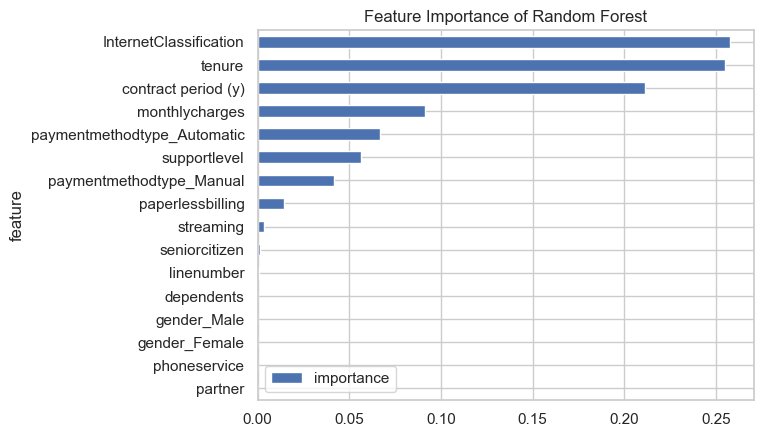

In [94]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')    
plt.title('Feature Importance of Random Forest')

<span style="color:red">This Code includes 1000 Random Forest Estimators(!) It would take around 25 minutes to execute. Your patience is appreciated.</span>

#### 3.1 Random Forest Overfitting Test 

In [97]:
est =range(5,1000)

test_acc_scores = [] 
for x in est:
    
    model = RandomForestClassifier(n_estimators=x, max_depth=3, random_state=1)  
    model.fit(x_train, y_train)

    y_test_pred_RandomForest = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_RandomForest)

    test_acc_scores.append(test_acc)
    test_acc

rf = pd.DataFrame({'est': est,'Test Accuracy': test_acc_scores})
# --------------------------TRAIN-----------------------------------------



train_acc_scores = [] 
for t in est:
    
    model = RandomForestClassifier(n_estimators=t, max_depth=3, random_state=1)  
    model.fit(x_train, y_train)

    y_train_pred_RandomForest = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred_RandomForest)

    train_acc_scores.append(train_acc)
    train_acc


rft = pd.DataFrame({'est': est,'Train Accuracy': train_acc_scores})


In [98]:
# rf
# rf.plot(kind = 'line', x = 'est', y ='Test Accuracy')
# rft
# rft.plot(kind = 'line', x = 'est', y ='Train Accuracy')

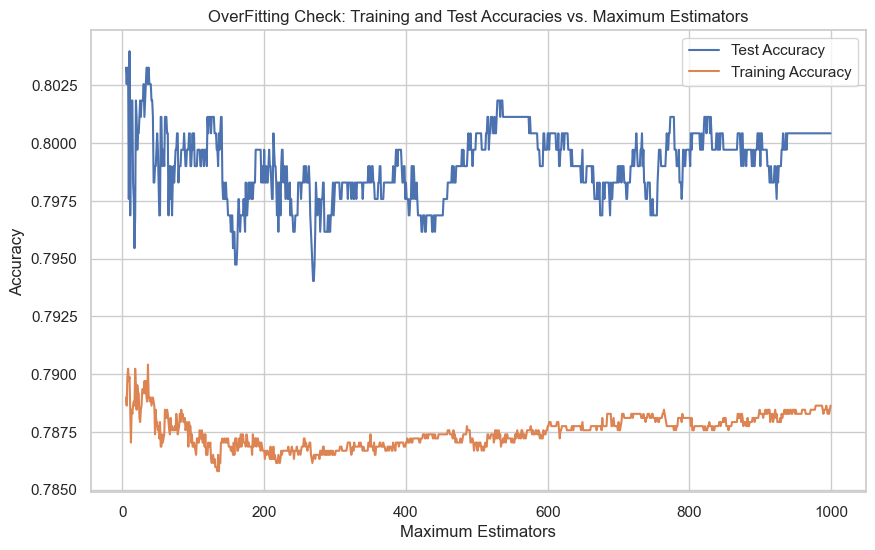

In [467]:
plt.figure(figsize=(10, 6))
plt.plot(est, test_acc_scores, label='Test Accuracy')
plt.plot(est, train_acc_scores, label='Training Accuracy')
plt.xlabel('Maximum Estimators')
plt.ylabel('Accuracy')
plt.title('OverFitting Check: Training and Test Accuracies vs. Maximum Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
rfmax =rf.loc[rf['Test Accuracy'].idxmax()]
rfmax


chosen_est = rfmax['est']
test_accuracy = rfmax['Test Accuracy']

print(f"We chose {chosen_depth} as the number of estimators as it has the highest accuracy {test_accuracy:.4f}")
print(f"est: {chosen_est:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")

We chose 3.0 as the number of estimators as it has the highest accuracy 0.8040
est: 10.000000
Test Accuracy: 0.803977


## 4. KNN - K Nearest Neighbors


In [100]:
clf = KNeighborsClassifier(n_neighbors=35)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
y_train_pred_Knn = clf.predict(x_train)
output = pd.DataFrame({'customerid': customer_test, 'churned_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn})
output

,customerid,churned_what_actualy_happened,churn_predicted_by_model
3381,8879-ZKJOF,0,0
6180,0201-MIBOL,0,0
4829,1600-DILPE,0,0
3737,8601-QACRS,1,0
4249,7919-ZODZZ,0,0
...,...,...,...
6912,2215-ZAFGX,0,1
2563,5130-IEKQT,1,1
2028,4452-ROHMO,0,0
2899,6164-HAQTX,0,0


In [101]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
train_acc = accuracy_score(y_train, y_train_pred_Knn)
KNearestNeighborsACC = test_acc
test_acc

0.8075284090909091

K Nearest Neighbors Overfitting Test 

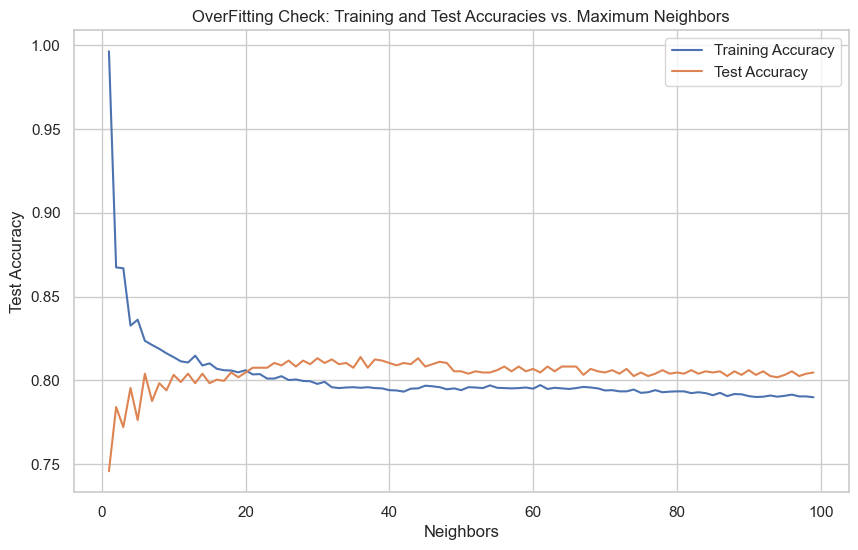

We chose 35.0 as the number of estimators as it has the highest accuracy 0.8139
est: 36.000000
Test Accuracy: 0.813920


In [102]:
nei =range(1,100)

test_acc_scores = [] 
for x in nei:
    
    clf = KNeighborsClassifier(n_neighbors=x)
    clf.fit(x_train, y_train)

    y_test_pred_Knn = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_Knn)

    test_acc_scores.append(test_acc)
    test_acc

n = pd.DataFrame({'nei': nei,'Test Accuracy': test_acc_scores})
# ---------------------Train------------------------------------------------


train_acc_scores = [] 
for xt in nei:
    
    clf = KNeighborsClassifier(n_neighbors=xt)
    clf.fit(x_train, y_train)

    y_train_pred_Knn = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred_Knn)

    train_acc_scores.append(train_acc)
    train_acc


nt = pd.DataFrame({'nei': nei,'Train Accuracy': train_acc_scores})


plt.figure(figsize=(10, 6))
plt.plot(nei, train_acc_scores, label='Training Accuracy')
plt.plot(nei, test_acc_scores, label='Test Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Test Accuracy')
plt.title('OverFitting Check: Training and Test Accuracies vs. Maximum Neighbors')
plt.legend()
plt.grid(True)
plt.show()


nmax =n.loc[n['Test Accuracy'].idxmax()]
nmax

chosen_nei = nmax['nei']
test_accuracy = nmax['Test Accuracy']

print(f"We chose {chosen_nei-1} as the number of estimators as it has the highest accuracy {test_accuracy:.4f}")
print(f"est: {chosen_nei:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")

In [103]:
y_train.value_counts()

churn
0    4113
1    1522
Name: count, dtype: int64

In [104]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark

array([0., 0., 0., ..., 0., 0., 0.])

# Benchmark and Conclusions:

In [105]:
Benchmark = accuracy_score(y_test, y_test_pred_Benchmark)
Benchmark

0.7535511363636364

In [106]:
RandomForestACC

0.8039772727272727

In [107]:
KNearestNeighborsACC

0.8075284090909091

In [108]:
DecisionTreeACC

0.8011363636363636

In [109]:
print(f'Decision Tree best accuracy Result: {DecisionTreeACC} while the benchmark is {Benchmark}')
print()
print(f'Random Forest best accuracy Result: {RandomForestACC} while the benchmark is {Benchmark}')
print()
print(f'KNearestNeighbors best accuracy Result: {KNearestNeighborsACC} while the benchmark is {Benchmark}')

Decision Tree best accuracy Result: 0.8011363636363636 while the benchmark is 0.7535511363636364

Random Forest best accuracy Result: 0.8039772727272727 while the benchmark is 0.7535511363636364

KNearestNeighbors best accuracy Result: 0.8075284090909091 while the benchmark is 0.7535511363636364


In [110]:
print(f'After evaluating different ML models, we have found that KNearest NeighborsACC is the best model for our DB to predict churn with {KNearestNeighborsACC:.3%} accuracy score')

After evaluating different ML models, we have found that KNearest NeighborsACC is the best model for our DB to predict churn with 80.753% accuracy score
